In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv(r'D:\사용자\USER\Desktop\데이터\유사도\유사도3.csv', encoding='cp949')
df = df.drop(columns=['구군'], axis=1)
df



,안전,건강,환경,경제,교육,사회,여가
0,0.7470,0.9220,0.4637,1.0000,0.6839,0.7425,0.6331
1,0.9320,0.6742,0.2865,0.9806,0.5013,0.4608,0.6691
2,0.5537,0.5898,0.5030,0.6915,0.2679,0.4317,0.2817
3,0.5347,0.4794,0.4196,0.6533,0.2464,0.4182,0.3257
4,0.6072,0.6373,0.4992,0.4445,0.4879,0.3519,0.3313
...,...,...,...,...,...,...,...
224,0.7012,0.2036,0.7717,0.1401,0.5064,0.2192,0.6758
225,0.4392,0.2150,0.7998,0.1799,0.8178,0.5717,0.4838
226,0.4268,0.2128,0.9117,0.0373,0.1640,0.0510,0.7900
227,0.4461,0.2537,0.6842,0.4250,0.6468,0.6107,0.6948


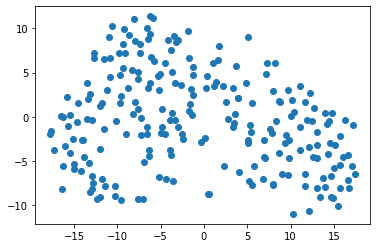

In [5]:
tsne = TSNE(n_components=2,random_state=0,learning_rate=200,init='pca',perplexity=30,metric="manhattan",early_exaggeration=30)
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'])
plt.show()

In [6]:
feature=pd.DataFrame(
    {"t1":tsne_results['tsne1'],
     "t2":tsne_results['tsne2']}
     )
feature

,t1,t2
0,-7.003496,-9.252703
1,5.126333,8.976897
2,-12.963505,-8.120878
3,-13.114311,-8.429770
4,-14.251414,-6.077283
...,...,...
224,9.653092,-6.606653
225,5.550569,1.528996
226,15.436219,-10.045493
227,3.918822,2.182352


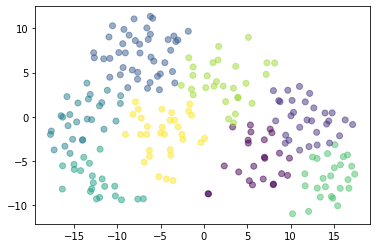

In [7]:
model = KMeans(n_clusters=8,init = 'k-means++', n_init = 10, max_iter = 300,random_state=5) #,algorithm='auto' 
#random_state 5가 최대 0.4059880543975222
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
r = pd.concat([feature,predict],axis=1)
plt.scatter(r['t1'],r['t2'],c=r['predict'],alpha=0.5)



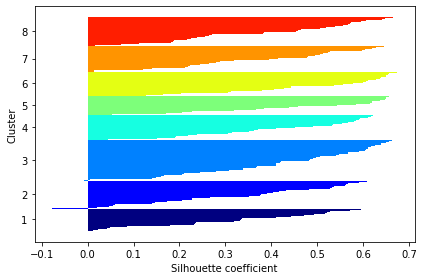

In [8]:
from sklearn.metrics import silhouette_samples
# sklearn의 metrics 모델 안에 silhouette_samples함수로 계산
# k-means++ 알고리즘 
#km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0) 

km=model
X=feature
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] 
# 실루엣 분석
silhouette_vals = silhouette_samples(X, y_km, metric = 'manhattan') 
# 시각화 
y_ax_lower, y_ax_upper = 0, 0
yticks = [] 
for i, c in enumerate(cluster_labels) :
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals) 
silhouette_avg = np.mean(silhouette_vals)
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout() 
plt.show()



In [9]:
silhouette_avg

0.40216452472916336

In [15]:
y_km

array([1, 3, 4, 4, 4, 4, 4, 4, 0, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 1, 4, 4, 4, 3, 1, 4, 4,
       4, 2, 2, 2, 2, 4, 1, 2, 4, 4, 2, 2, 4, 0, 5, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 6, 6, 6, 2, 1, 3, 3,
       6, 6, 3, 6, 5, 5, 6, 5, 6, 6, 0, 6, 6, 6, 3, 3, 1, 6, 5, 6, 3, 5,
       3, 5, 6, 1, 3, 3, 1, 1, 3, 2, 1, 5, 6, 5, 5, 5, 5, 5, 2, 1, 1, 3,
       3, 5, 3, 0, 0, 0, 0, 0, 6, 6, 2, 1, 3, 6, 1, 6, 5, 0, 0, 0, 5, 0,
       0, 0, 3, 3, 0, 5, 0, 0, 0, 0, 1, 1, 4, 2, 1, 2, 5, 6, 6, 2, 0, 0,
       5, 0, 4, 6, 5, 0, 3, 6, 0, 6, 5, 3, 3, 3, 2, 5, 1, 2, 2, 6, 3, 6,
       5, 5, 6, 6, 5, 3, 0, 3, 3])

In [16]:
feature2=pd.DataFrame(
    {"t1":tsne_results['tsne1'],
     "t2":tsne_results['tsne2'],
     "c":y_km,
    }
     )
feature2

,t1,t2,c
0,-7.003496,-9.252703,1
1,5.126333,8.976897,3
2,-12.963505,-8.120878,4
3,-13.114311,-8.429770,4
4,-14.251414,-6.077283,4
...,...,...,...
224,9.653092,-6.606653,5
225,5.550569,1.528996,3
226,15.436219,-10.045493,0
227,3.918822,2.182352,3


In [17]:
#feature2.to_excel('D:\사용자\\USER\\Desktop\\데이터\\유사도\\클러스터링.xlsx', index=False)